In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.text import *

## Criando o databunch para o LM

In [3]:
path = 'Data'
data_lm = (TextList.from_folder(path)
          .split_by_rand_pct(valid_pct=0.1)
          .label_for_lm()
          .databunch())
data_lm.save('data_lm')

In [4]:
data_lm.show_batch()

idx,text
0,"/ 2011 , que aprova o xxmaj regulamento xxmaj técnico xxup mercosul sobre “ xxmaj lista de xxmaj substâncias de xxmaj ação xxmaj conservante permitidas para xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes ” e revoga as xxmaj resoluções xxup gmc nos 05 / 99 e 72 / 00 . \n xxmaj art . 3º xxmaj fica revogada a xxup rdc nº 162"
1,"e tendo em vista o disposto no inciso xxup ii e nos § § 1º e 3º do art . 54 do xxmaj regimento xxmaj interno aprovado nos termos do xxmaj anexo i da xxmaj portaria xxmaj nº 354 da xxup anvisa , de 11 de agosto de 2006 , republicada no xxup dou de 21 de agosto de 2006 , em reunião realizada em 2 de dezembro de 2008"
2,aldicarbe ( xxmaj xxunk ) \n b ) xxmaj sinonímia : xxup xxunk \n c ) n ° xxup cas : 116 - 06 - 3 \n d ) xxmaj nome químico : xxunk o - methyl xxunk \n e ) xxmaj fórmula bruta : xxup xxunk \n f ) xxmaj fórmula estrutural : \n \n g ) xxmaj grupo químico : metilcarbamato de
3,", cana - de - açúcar , cevada e xxunk . \n \n \n \n xxup xxunk - xxmaj xxunk \n a ) xxmaj ingrediente ativo ou nome comum : xxmaj xxunk ( xxmaj xxunk ) \n b ) xxmaj sinonímia : xxup rh xxunk ; xxup rh 53 xxunk \n c ) xxmaj nº xxup cas : xxunk - 89 - 0 \n d"
4,"metila somente poderão ser realizadas por empresa prestadora de serviço na aplicação de agrotóxicos , desde que devidamente registradas no órgão estadual \n ou municipal , conforme o art . 4o da xxmaj lei no 7.802 , de 11 de julho de 1989 , e autorizadas pelo xxup mapa a realizar tratamento fitossanitário com fins quarentenários , conforme norma específica . \n § 1o xxmaj as empresas de"


## Treinando o LM

In [5]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


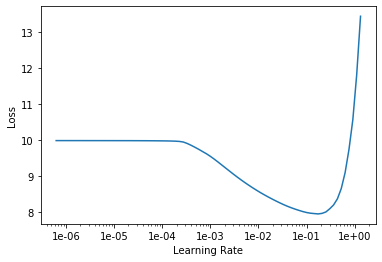

In [6]:
learn_lm.lr_find()
learn_lm.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,3.423591,3.483715,0.372944,04:14
1,2.774406,2.863147,0.436789,04:20
2,2.649703,2.765302,0.443073,04:21
3,2.497877,2.609047,0.465355,04:21
4,2.336405,2.429210,0.488295,04:21
5,2.245034,2.216451,0.523190,04:21
6,1.915938,2.019110,0.558649,04:21
7,1.736772,1.853192,0.591152,04:21
8,1.612592,1.756426,0.613285,04:21
9,1.599454,1.739765,0.616442,04:21


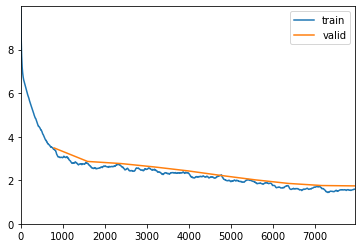

Better model found at epoch 0 with accuracy value: 0.3729444146156311.
Better model found at epoch 1 with accuracy value: 0.4367886781692505.
Better model found at epoch 2 with accuracy value: 0.443073034286499.
Better model found at epoch 3 with accuracy value: 0.46535512804985046.
Better model found at epoch 4 with accuracy value: 0.4882948398590088.
Better model found at epoch 5 with accuracy value: 0.5231897234916687.
Better model found at epoch 6 with accuracy value: 0.5586490631103516.
Better model found at epoch 7 with accuracy value: 0.5911523699760437.
Better model found at epoch 8 with accuracy value: 0.6132849454879761.
Better model found at epoch 9 with accuracy value: 0.6164417266845703.


In [7]:
max_lr = 1e-2
learn_lm.fit_one_cycle(10, max_lr=max_lr, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_lm, every='improvement', monitor='accuracy', name='learn_lm')])

In [8]:
#Carrego a melhor versão do language model
learn_lm.load('learn_lm')
learn_lm.save_encoder('enc')

In [9]:
print(learn_lm.predict('Art. 1º Esta resolução visa',n_words=200,temperature=0.8))

Art. 1º Esta resolução visa o controle de insumos farmacêuticos ativos de uso consagrado que não cumpra com as especificações do fabricante e a sua qualidade . 
  § 1º Ficam excluídos do disposto no caput deste artigo os produtos cosméticos que não se encontram em conformidade com as Boas Práticas de Fabricação ( BPF ) . 
  § 2º Esta Resolução se aplica a todos os produtos para diagnóstico in vivo classificados como de uso profissional , conforme prescrição médica . 
  § 3º As empresas fabricantes e importadoras de produtos de higiene pessoal , cosméticos e perfumes , são enquadrados nas seguintes classes de risco : 
  i - Classe i : produtos de higiene pessoal , cosméticos e perfumes , com venda sem exigência de prescrição médica , em conformidade com a Resolução da Diretoria Colegiada - RDC nº 17 , de 16 de abril de 2010 . 
  II - Microempreendedor individual , conforme definido pela Lei nº 5.991 , de 1973 , que dispõe sobre o registro de medicamentos fitoterápicos e o registro e a n

## Criando o databunch para o classificador

In [11]:
data_clas = (TextList.from_folder(path,vocab=data_lm.train_ds.vocab)
          .split_by_rand_pct(valid_pct=0.2)
          .label_from_folder()
          .databunch())
data_clas.save('data_clas')

In [12]:
data_clas.show_batch()

text,target
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada - xxup rdc xxmaj nº 81 , xxup de 05 xxup de xxup novembro xxup de 2008 ( * ) \n ( xxmaj publicada em xxup dou nº 216 , de 06 de novembro de 2008 ) \n ( xxmaj republicada em xxup dou nº 219 , de 11 de novembro de 2008 ) \n ( xxmaj revogadas","portos, aeroportos e fronteiras"
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada – xxup rdc xxmaj nº 67 , xxup de 8 xxup de xxup outubro xxup de 2007 \n ( xxmaj publicada em xxup dou nº 195 , de 9 de outubro de 2007 ) \n a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere o",serviços de saúde
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada - xxup rdc xxmaj nº 255 , xxup de 10 xxup de xxup dezembro xxup de 2018 \n ( xxmaj publicada no xxup dou nº 237 , de 11 de dezembro de 2018 ) \n xxmaj aprova e promulga o xxmaj regimento xxmaj interno da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária – xxmaj anvisa e dá",gestão interna
"xxbos xxunk xxmaj sanitária xxmaj brasileira \n xxup resolução xxup da xxup diretoria xxup colegiada - xxup rdc xxmaj nº 50 , xxup de 21 xxup de xxup fevereiro xxup de 2002 \n \n ( xxmaj publicada em xxup dou nº 54 , de 20 de março de 2002 ) \n \n xxmaj observação 1 – xxmaj os itens desta xxmaj resolução referentes à \n atenção",serviços de saúde
"xxbos xxup resolução xxup de xxup diretoria xxup colegiada – xxup rdc xxmaj nº 17 , xxup de 16 xxup de xxup abril xxup de 2010 \n ( xxmaj publicada em xxup dou nº 73 , de 19 de abril de 2010 ) \n a xxmaj diretoria xxmaj colegiada da xxmaj agência xxmaj nacional de xxmaj vigilância xxmaj sanitária , no uso da atribuição que lhe confere o",medicamentos


## Treinando o classificador

In [13]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load_encoder('enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1297 items)
x: TextList
xxbos xxup portaria xxmaj nº 296 , xxup de 16 xxup de xxup abril xxup de 1998 
  ( xxmaj publicada em xxup dou nº 74 , de 20 de abril de 1998 ) 
 
  a xxmaj secretária de xxmaj vigilância xxmaj sanitária do xxmaj ministério da xxmaj saúde , no uso de suas atribuições legais e considerando , a necessidade do constante aperfeiçoamento das ações de controle sanitário na área de xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes , visando a proteção à saúde da população ; 
  a importância de compatibilizar os regulamentos nacionais com os instrumentos harmonizados no âmbito do xxup mercosul , xxmaj res . xxup gmc nº 41 / 96 ; 
  a necessidade de um sistema de documentação técnica uniforme entre os quatro xxmaj estados xxmaj parte que vise padronizar a tramitação de registo de xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes ; 
  a necessidade de esta

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


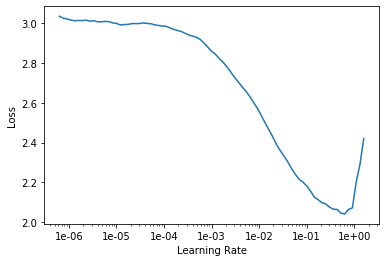

In [14]:
learn_clas.lr_find()
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.872521,1.836554,0.549383,03:36
1,1.373826,1.503284,0.601852,03:22
2,1.202573,1.195728,0.679012,03:36
3,1.139689,1.159464,0.669753,03:30
4,1.060397,1.273959,0.669753,03:22
5,0.973858,1.389143,0.685185,03:22
6,0.940309,1.080952,0.762346,03:31
7,0.890546,1.300636,0.651235,03:33
8,0.846600,0.907187,0.743827,03:30
9,0.776052,1.012000,0.746914,03:32


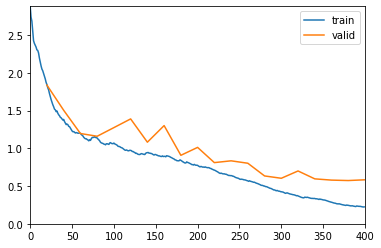

Better model found at epoch 0 with accuracy value: 0.5493826866149902.
Better model found at epoch 1 with accuracy value: 0.6018518805503845.
Better model found at epoch 2 with accuracy value: 0.6790123581886292.
Better model found at epoch 5 with accuracy value: 0.6851851940155029.
Better model found at epoch 6 with accuracy value: 0.7623456716537476.
Better model found at epoch 10 with accuracy value: 0.7746913433074951.
Better model found at epoch 11 with accuracy value: 0.790123462677002.
Better model found at epoch 13 with accuracy value: 0.8333333134651184.
Better model found at epoch 14 with accuracy value: 0.8518518805503845.
Better model found at epoch 18 with accuracy value: 0.854938268661499.


In [15]:
max_lr = 1e-1
learn_clas.fit_one_cycle(20, max_lr=max_lr , moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas')])

In [6]:
#carrego a melhor versão do classificador
learn_clas.load('learn_clas')
learn_clas.unfreeze()
learn_clas.lr_find()
learn_clas.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 34.00 MiB (GPU 0; 7.43 GiB total capacity; 6.67 GiB already allocated; 4.94 MiB free; 185.38 MiB cached)

In [ ]:
lr_min = 
lr_max = 
learn_clas.fit_one_cycle(20, max_lr=slice(lr_min,lr_max), moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn_clas, every='improvement', monitor='accuracy', name='learn_clas_ft')])

## Avaliando os Resultados

In [4]:
data_clas = load_data('Data',file='data_clas')

In [5]:
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained=False)
learn_clas.load('learn_clas')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1297 items)
x: TextList
xxbos xxup portaria xxmaj nº 296 , xxup de 16 xxup de xxup abril xxup de 1998 
  ( xxmaj publicada em xxup dou nº 74 , de 20 de abril de 1998 ) 
 
  a xxmaj secretária de xxmaj vigilância xxmaj sanitária do xxmaj ministério da xxmaj saúde , no uso de suas atribuições legais e considerando , a necessidade do constante aperfeiçoamento das ações de controle sanitário na área de xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes , visando a proteção à saúde da população ; 
  a importância de compatibilizar os regulamentos nacionais com os instrumentos harmonizados no âmbito do xxup mercosul , xxmaj res . xxup gmc nº 41 / 96 ; 
  a necessidade de um sistema de documentação técnica uniforme entre os quatro xxmaj estados xxmaj parte que vise padronizar a tramitação de registo de xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes ; 
  a necessidade de esta

In [12]:
#carrego a melhor versão do classificador fine tuned
#learn_clas.load('learn_clas_ft')
interp = ClassificationInterpretation.from_learner(learn_clas)

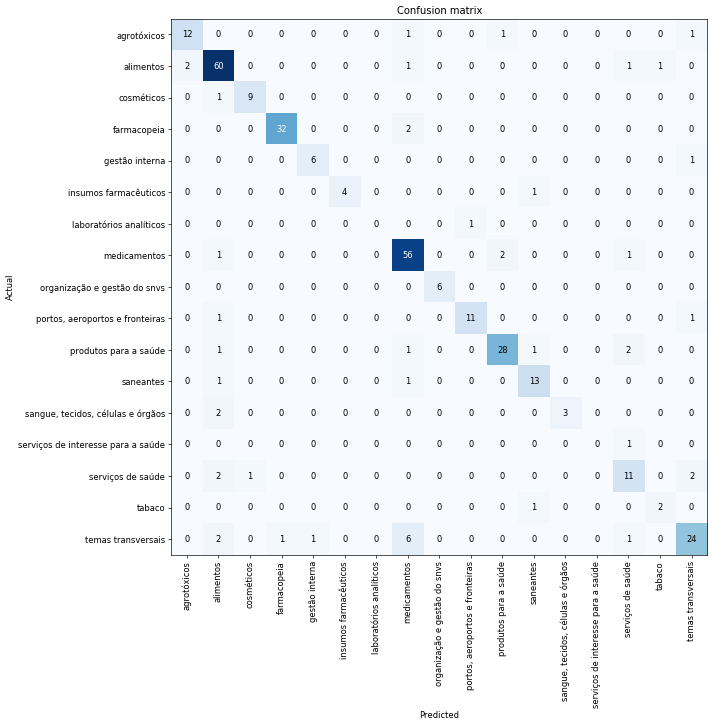

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Agora pegando a representação vetorial das normas

In [15]:
#importando o arquivo que contém as normas na ordem que eu conheço
resolucoes = list(pd.read_csv('Data.csv',sep='|',encoding='utf-8')['textos'])

'PORTARIA N° 11, DE 15 DE MAIO DE 1987\n(Publicada no DOU de 20 de maio de 1987)\nDispõe sobre a expressão "qualquer alimento" constante da Tabela II do decreto 55.871/65.\n\xa0\nO SECRETÁRIO NACIONAL DE VIGILÂNCIA SANITÁRIA DO MINISTÉRIO DA SAÚDE no uso de suas atribuições legais e considerando:\n1 - Que o limite máximo de tolerância de 0,10 ppm ou mg/kg de cromo no produto a ser consumido não apresenta risco à saúde humana:\n2 - Que na Tabela II do Decreto 55.871/65 sobre contaminantes inorgânicos (especificamente cromo) os limites estabelecidos não fazem referência à discriminação dos alimentos ocasionando portanto dúvidas nos resultados analíticos.\nRESOLVE:\nDeterminar que a expressão "qualquer alimento" constante da Tabela II do Decreto 55.871/65, que estabelece o limite máximo de tolerância de 0,10 ppm ou mg/kg, para o cromo se refere ao resultado da análise no produto a ser consumido.\nEsta Portaria entrará em vigor na data de sua publicação revogadas as disposições em contrári

In [ ]:
#Rodar essa célula se quer a representação do classificador
mbe = learn_clas.model[0]

In [17]:
data_lm = load_data('Data',file='data_lm')
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult = 0.5, pretrained=False, callback_fns=ShowGraph)
learn_lm.load('learn_lm')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1459 items)
x: LMTextList
xxbos xxmaj art 1º xxmaj fica aprovado o xxmaj regulamento xxmaj técnico xxmaj mercosul sobre xxmaj lista de xxmaj substâncias de xxmaj ação xxmaj conservante permitidas para xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes nos termos desta xxmaj resolução . 
  xxmaj art . 2º xxmaj esta xxmaj resolução incorpora ao ordenamento jurídico nacional a xxmaj resolução xxup gmc xxup mercosul xxmaj nº. 08 / 2011 , que aprova o xxmaj regulamento xxmaj técnico xxup mercosul sobre “ xxmaj lista de xxmaj substâncias de xxmaj ação xxmaj conservante permitidas para xxmaj produtos de xxmaj higiene xxmaj pessoal , xxmaj cosméticos e xxmaj perfumes ” e revoga as xxmaj resoluções xxup gmc nos 05 / 99 e 72 / 00 . 
  xxmaj art . 3º xxmaj fica revogada a xxup rdc nº 162 , de 11 de setembro de 2001 , vinte e quatro meses contados a partir da data de publicação desta xxup rdc . 
  § 1º xxmaj os

In [18]:
#Rodar essa célula se que a representação do language model
mbe = MultiBatchEncoder(70,1400,learn_lm.model[0])

def masked_concat_pool(outputs, mask):
    "Pool MultiBatchEncoder outputs into one vector [last_hidden, max_pool, avg_pool]."
    output = outputs[-1]
    avg_pool = output.masked_fill(mask[:, :, None], 0).mean(dim=1)
    avg_pool *= output.size(1) / (output.size(1)-mask.type(avg_pool.dtype).sum(dim=1))[:,None]
    max_pool = output.masked_fill(mask[:,:,None], -float('inf')).max(dim=1)[0]
    x = torch.cat([output[:,-1], max_pool, avg_pool], 1)
    return x

In [19]:
X = np.zeros((1,1200))
texts = []
for resolucao in resolucoes:
  xb,yb = learn_clas.data.one_item(resolucao)
  sentence = torch.cuda.LongTensor(xb.tolist()[0]).unsqueeze(0)
  raw_outputs, outputs, masks = mbe.forward(sentence)
  sentence_rep = masked_concat_pool(outputs, masks)
  X = np.append(X,sentence_rep,axis=0)

In [20]:
#salvando a matriz de representação das normas em um arquivo
X = np.delete(X, (0), axis=0)
np.save('X_LM', X)